<Figure size 1000x600 with 0 Axes>

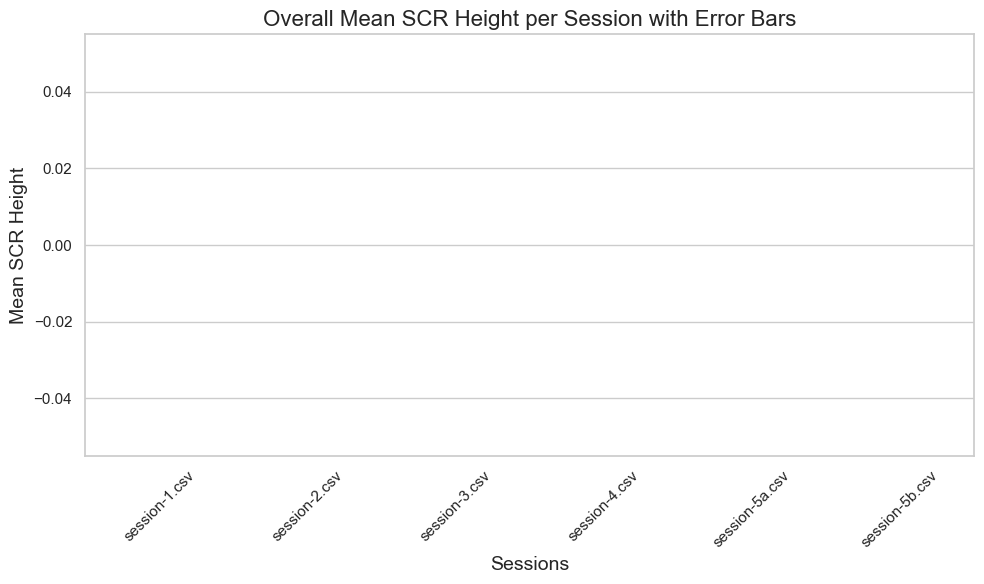

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to the main folder containing subfolders for each subject
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-eda-new'

# Dictionary to store the mean SCR_Amplitude values for each subject and session
subject_mean_data = {}

# Traverse the main folder
for subject_folder in sorted(os.listdir(base_dir)):
    subject_path = os.path.join(base_dir, subject_folder)
    
    # Ensure it's a folder (ignore files in the main folder)
    if os.path.isdir(subject_path):
        # Dictionary to store mean SCR_Amplitude values for each session
        session_mean_data = {}

        # Traverse the session files in each subject folder
        for session_file in sorted(os.listdir(subject_path)):
            if session_file.endswith('.csv'):
                session_path = os.path.join(subject_path, session_file)
                
                # Read the CSV file
                df = pd.read_csv(session_path)
                
                # Calculate the mean SCR_Amplitude where SCR_Peaks == 1
                # mean_HR = df['BPM'].mean()
                # mean_SCR_Amp = df.loc[df['SCR_Peaks'] == 1, 'SCR_Height'].mean()
                mean_SCR_Amp = df.loc[(df['SCR_Peaks'] == 1) & (df['SCR_Height'] > 0.02), 'SCR_Height'].mean()
                # Save the mean value for the session
                session_mean_data[session_file] =  mean_SCR_Amp
        
        # Save the mean data for the subject
        subject_mean_data[subject_folder] = session_mean_data

# Calculate overall mean SCR_Amplitude per session across all subjects
overall_mean_data = {}
all_sessions = sorted(list({session for sessions in subject_mean_data.values() for session in sessions}))

# Traverse all sessions and calculate mean across all subjects for each session
for session in all_sessions:
    session_values = [sessions.get(session, 0) for sessions in subject_mean_data.values()]
    overall_mean_data[session] = np.mean(session_values)

# Plotting only the overall mean SCR_Amplitude values for each session
plt.figure(figsize=(10, 6))


# Set the plot style using Seaborn for better aesthetics
sns.set(style="whitegrid")

# Prepare data for the plot
overall_mean_values = [overall_mean_data[session] for session in all_sessions]

# Calculate the standard deviation for each session across subjects (for error bars)
session_std_devs = [np.std([sessions.get(session, 0) for sessions in subject_mean_data.values()]) for session in all_sessions]

# Plotting the bar graph with error bars
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn with error bars
sns.barplot(x=all_sessions, y=overall_mean_values, palette='dark:#6A9', saturation=0.8, ci=None)

# Add error bars manually using plt.errorbar
plt.errorbar(all_sessions, overall_mean_values, yerr=session_std_devs, fmt='none', c='black', capsize=5)

# Add labels and title
plt.xlabel('Sessions', fontsize=14)
plt.ylabel('Mean SCR Height', fontsize=14)
plt.title('Overall Mean SCR Height per Session with Error Bars', fontsize=16)

# Rotate session labels for readability
plt.xticks(rotation=45)

# Show the plot with tight layout
plt.tight_layout()

# Display the plot
plt.show()


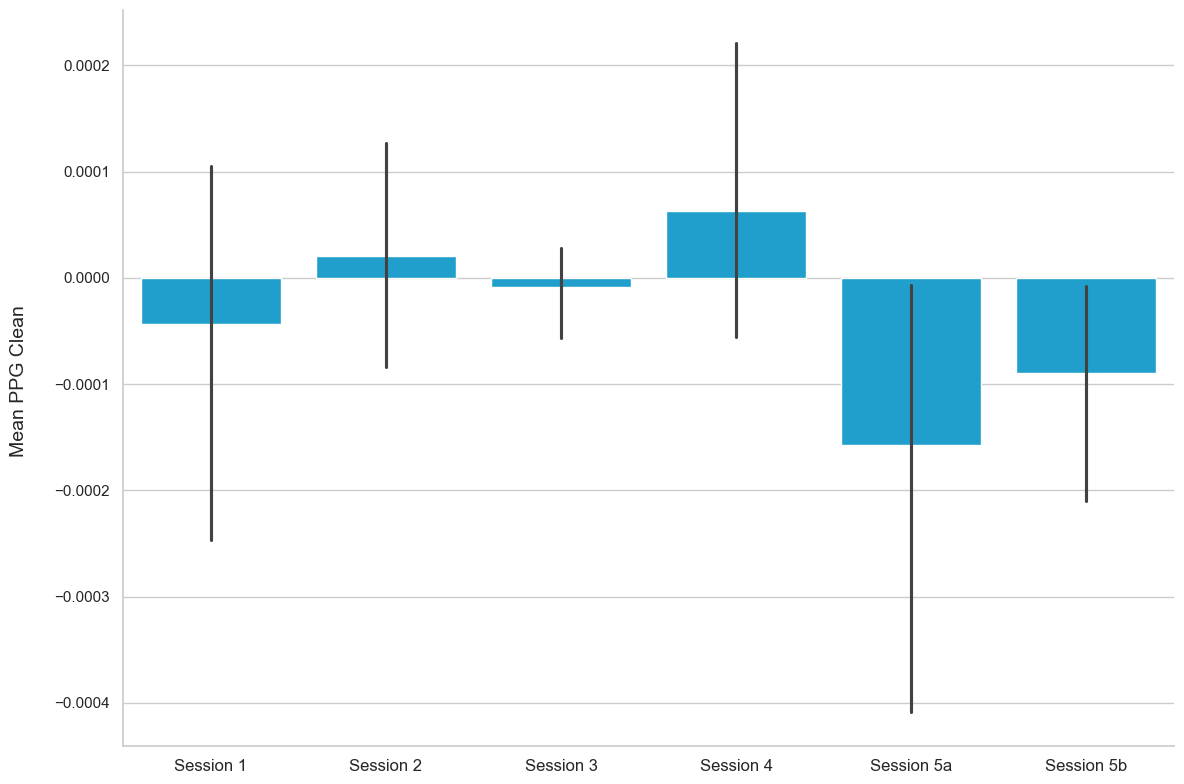

In [11]:


import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-eda-new'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'


sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}

for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                
                mean_hr = df_session['EDA_Phasic'].mean()
                session_means[session_name].append([sub_dir, mean_hr])

    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_hr'])

    # Plot each subject's mean tonic EDA for each session
# Sinai color code: light blue = #05ace8, dark blue = #1e226c, magenta = #c53088

all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name  # Add a session column
    all_sessions.append(df)

df_all_sessions = pd.concat(all_sessions, ignore_index=True)

subject_order = [f'sub-{i}' for i in range(1, 11)] 
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)
df_all_sessions['mean_hr'].fillna(df_all_sessions['mean_hr'].mean(), inplace=True)
df_all_sessions = df_all_sessions.sort_values(by=['subject', 'session'])


all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name
    all_sessions.append(df)
df_all_sessions = pd.concat(all_sessions, ignore_index=True)

plt.figure(figsize=(12, 8))

# Define labels for the x-axis
labels = ['Session 1', 'Session 2', 'Session 3', 'Session 4', 'Session 5a', 'Session 5b']

sns.barplot(data=df_all_sessions, x='session', y='mean_hr', color = '#05ace8')
plt.xlabel(None)
plt.xticks(ticks=plt.xticks()[0], labels=labels, fontsize=12)
plt.ylabel('Mean PPG Clean \n', fontsize = 14)
plt.tight_layout()
sns.despine()


# if save_figs == 1:
#     plt.savefig(f"{fig_dir}/grouped-participant-session-means.png", dpi=300)
    


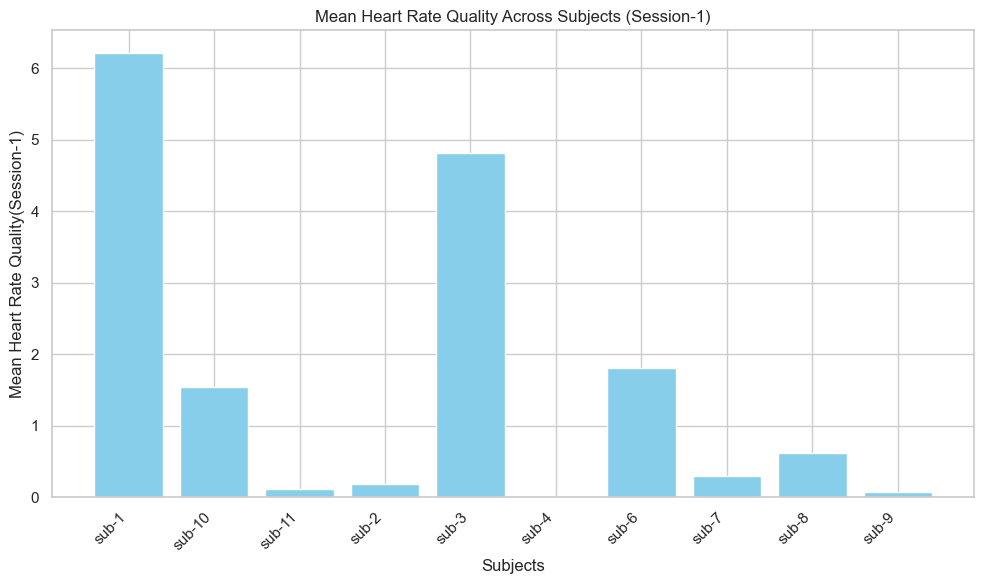

In [12]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import seaborn as sns


# Define the path to the directory containing subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-eda-new'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}
folder_names = ['sub-1', 'sub-2', 'sub-3', 'sub-4', 'sub-5', 'sub-6', 'sub-7', 'sub-8', 'sub-9', 'sub-10', 'sub-11']


# Initialize dictionary to store session-1 mean SCR Amplitude for each subject
session_1_means = {}

# Loop through subjects
for sub_dir in sorted(folder_names):
    sub_path = os.path.join(base_dir, sub_dir)
    if os.path.isdir(sub_path):
        session_1_path = os.path.join(sub_path, sessions[4])  # Access only session-1.csv
        if (os.path.exists(session_1_path)):
            try:
                df_session_1 = pd.read_csv(session_1_path)
                mean_SCR_Amp = df_session_1['EDA_Tonic'].mean()
                session_1_means[sub_dir] = mean_SCR_Amp
            except Exception as e:  # Handle potential errors
                print(f"Error processing file {session_1_path}: {e}")

# Create a pandas Series from the dictionary for plotting
subjects = list(session_1_means.keys())
mean_values = list(session_1_means.values())
df_data = pd.Series(mean_values, index=subjects)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df_data.index, df_data.values, color='skyblue')

# Set labels and title
plt.xlabel('Subjects')
plt.ylabel('Mean Heart Rate Quality(Session-1)')
plt.title('Mean Heart Rate Quality Across Subjects (Session-1)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

# Show or save the plot
# if save_figs == 1:
#     plt.savefig(f"{fig_dir}/Mean_SCR_Amplitude_Session_1.png", dpi=300, bbox_inches='tight')
# else:
#     plt.show()


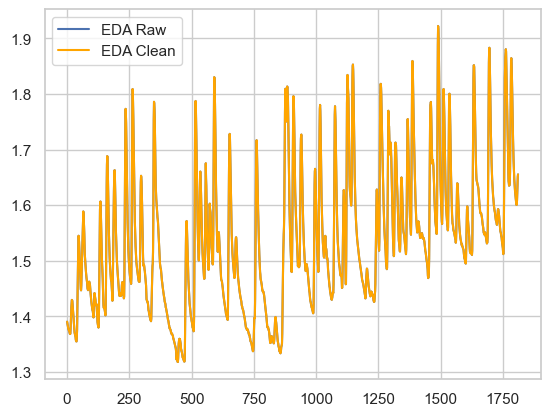

In [14]:

data = pd.read_csv('/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-eda-new/sub-10/session-5a.csv')
plt.plot(data ['EDA_Raw'], label='EDA Raw')
plt.plot(data ['EDA_Clean'], label='EDA Clean', color='orange')
plt.legend()
plt.show()

In [17]:

import os
import pandas as pd
import matplotlib.pyplot as plt

# Base directory for subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-eda-new'

# Loop through subfolders
for sub_folder in sorted(os.listdir(base_dir)):
    sub_path = os.path.join(base_dir, sub_folder)

    # Check if it's a directory
    if os.path.isdir(sub_path):
        session_file = 'session-1.csv'  # Target session file
        session_path = os.path.join(sub_path, session_file)

        # Check if session-1.csv exists
        if os.path.exists(session_path):
            try:
                # Read the CSV file
                data = pd.read_csv(session_path)

                # Assuming x-axis and y-axis data are in 'timestamp' and 'EDA_Tonic'
                # x_data = df['Timestamp_New']
                # y_data = df['PPG_Rate']


                # Plot heart rate over time
                plt.figure(figsize=(12, 6))
                data['Timestamp']= pd.to_datetime(data['timestamp'], utc=True)
                plt.plot(data['Timestamp'], data['EDA_Clean'], label='Heart Rate (bpm)')
                plt.xlabel('Time')
                plt.ylabel('Heart Rate (bpm)')
                plt.title(f'Heart Rate for Subject: {sub_folder}')
                plt.legend()
                plt.show()
                # Close the plot for next iteration
                plt.close()
            except Exception as e:  # Handle potential errors during reading
                print(f"Error processing file {session_path}: {e}")

Error processing file /Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-eda-new/sub-1/session-1.csv: 'timestamp'
Error processing file /Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-eda-new/sub-10/session-1.csv: 'timestamp'
Error processing file /Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-eda-new/sub-11/session-1.csv: 'timestamp'
Error processing file /Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-eda-new/sub-2/session-1.csv: 'timestamp'
Error processing file /Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-eda-new/sub-3/session-1.csv: 'timestamp'
Error processing file /Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-eda-new/sub-4/session-1.csv: 'timestamp'
Error processing file /Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-eda-new/sub-6/session-1.csv: 'timestamp'
Error processing file /Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-eda-new/sub-7/session-1.csv: 'timestamp'
Error processing file /Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-eda-

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>